In [1]:
import asimov_database as ad
import numpy as np

pr = ad.ParquetReader()
level_data = pr.get_parquet("DOLZ19", "2019-11-11", "level-book")
events = pr.get_parquet("DOLZ19", "2019-11-11", "events")["incremental"].read().to_pandas()
snap = pr.get_parquet("DOLZ19", "2019-11-11", "events")["snapshot"].read().to_pandas()

In [2]:
level_data_wdo = pr.get_parquet("WDOZ19", "2019-11-11", "level-book")
events_wdo = pr.get_parquet("WDOZ19", "2019-11-11", "events")["incremental"].read().to_pandas()
snap_wdo = pr.get_parquet("WDOZ19", "2019-11-11", "events")["snapshot"].read().to_pandas()

In [3]:
bid_price = level_data["bid_price"].read().to_pandas()
bid_quantity = level_data["bid_quantity"].read().to_pandas()
bid_inc_code = level_data["bid_inc_code"].read().to_pandas()

ask_price = level_data["ask_price"].read().to_pandas()
ask_quantity = level_data["ask_quantity"].read().to_pandas()
ask_inc_code = level_data["ask_inc_code"].read().to_pandas()

In [4]:
bid_price_wdo= level_data_wdo["bid_price"].read().to_pandas()
bid_quantity_wdo = level_data_wdo["bid_quantity"].read().to_pandas()
bid_inc_code_wdo = level_data_wdo["bid_inc_code"].read().to_pandas()

ask_price_wdo = level_data_wdo["ask_price"].read().to_pandas()
ask_quantity_wdo = level_data_wdo["ask_quantity"].read().to_pandas()
ask_inc_code_wdo = level_data_wdo["ask_inc_code"].read().to_pandas()

In [5]:
bid_wdo = bid_price_wdo[["bid_0"]].copy()
bid_quantity_wdo.columns = ["bid_quantity_wdo_{}".format(i) for i in range(bid_quantity_wdo.shape[1])]
bid_wdo["bid_quantity_wdo_0"] = bid_quantity_wdo["bid_quantity_wdo_0"]
bid_wdo["i_bid_wdo"] = bid_inc_code_wdo[0]#.apply(lambda x: "B_" + str(x))
bid_wdo.rename({'bid_0' : 'bid_wdo_0'}, axis = 1, inplace = True )

In [6]:
bid_wdo.head()

,bid_wdo_0,bid_quantity_wdo_0,i_bid_wdo
2019-11-11 10:30:18.079000+00:00,0.0,0.0,0
2019-11-11 10:30:18.079000+00:00,0.0,0.0,1
2019-11-11 11:18:30.414000+00:00,0.0,0.0,2
2019-11-11 11:18:30.414000+00:00,0.0,0.0,3
2019-11-11 11:55:00.015000+00:00,0.0,0.0,4


In [7]:
bid = bid_price[["bid_0"]].copy()
bid_quantity.columns = ["bid_quantity_{}".format(i) for i in range(bid_quantity.shape[1])]
bid["bid_quantity_0"] = bid_quantity["bid_quantity_0"]
bid["i_bid"] = bid_inc_code[0]#.apply(lambda x: "B_" + str(x))
bid.head()

,bid_0,bid_quantity_0,i_bid
2019-11-11 10:30:18.079000+00:00,0.0,0.0,0
2019-11-11 10:30:18.079000+00:00,0.0,0.0,1
2019-11-11 11:18:30.414000+00:00,0.0,0.0,2
2019-11-11 11:18:30.414000+00:00,0.0,0.0,3
2019-11-11 11:55:00.014000+00:00,0.0,0.0,4


In [8]:
ask = ask_price[["ask_0"]].copy()
ask_quantity.columns = ["ask_quantity_{}".format(i) for i in range(ask_quantity.shape[1])]
ask["ask_quantity_0"] = ask_quantity["ask_quantity_0"]
ask["i_ask"] =ask_inc_code[0]#.apply(lambda x: "A_" + str(x))
ask.head(3)

,ask_0,ask_quantity_0,i_ask
2019-11-11 10:30:18.079000+00:00,0.0,0.0,0
2019-11-11 10:30:18.079000+00:00,0.0,0.0,1
2019-11-11 11:18:30.414000+00:00,0.0,0.0,2


In [9]:
ask_wdo = ask_price_wdo[["ask_0"]].copy()

ask_wdo.rename({'ask_0':'ask_wdo_0'}, axis = 1, inplace= True)

ask_quantity_wdo.columns = ["ask_quantity_wdo_{}".format(i) for i in range(ask_quantity_wdo.shape[1])]
ask_wdo["ask_quantity_wdo_0"] = ask_quantity_wdo["ask_quantity_wdo_0"]
ask_wdo["i_ask_wdo"] =ask_inc_code_wdo[0]#.apply(lambda x: "A_" + str(x))
ask_wdo.head(3)

,ask_wdo_0,ask_quantity_wdo_0,i_ask_wdo
2019-11-11 10:30:18.079000+00:00,0.0,0.0,0
2019-11-11 10:30:18.079000+00:00,0.0,0.0,1
2019-11-11 11:18:30.414000+00:00,0.0,0.0,2


In [10]:
# events["i_bid"] = "B_" + events["i"].astype(str)
# events["i_ask"] = "A_" + events["i"].astype(str)

In [11]:
events.reset_index(inplace=True)
events_wdo.reset_index(inplace=True)

In [12]:
# events[events['i'] == 485885]#.head()

In [13]:
valor_dol = np.setdiff1d(events['i'].values, bid_inc_code[0].values)
valor_dol    

array([    16,     19,     20, ..., 541402, 541403, 541404])

In [14]:
retira_dol = np.setdiff1d(valor_dol,ask_inc_code[0].values)
retira_dol

array([], dtype=int64)

In [15]:
valor_wdo_ask = np.setdiff1d(events_wdo['i'].values, bid_inc_code_wdo[0].values)
valor_wdo_ask

array([      6,       7,       9, ..., 1565016, 1565017, 1565018])

In [16]:
retira_wdo_ask = np.setdiff1d(valor_wdo_ask,ask_inc_code_wdo[0].values)
retira_wdo_ask

array([], dtype=int64)

In [17]:
valor_wdo_bid = np.setdiff1d(events_wdo['i'].values, ask_inc_code_wdo[0].values)
valor_wdo_bid

array([      5,       8,      11, ..., 1565012, 1565013, 1565015])

In [18]:
retira_wdo_bid = np.setdiff1d(valor_wdo_bid, bid_inc_code_wdo[0].values)
retira_wdo_bid

array([], dtype=int64)

In [19]:
events2 = events[events['i'] != 485881 ]
events_wdo_3 = events_wdo[ (events_wdo['i'] != 5) & (events_wdo['i'] != 1839051) & (events_wdo['i'] != 2015673) ]



In [20]:
bid["msg_seq_num"] = events[events["side"] != "A"]["msg_seq_num"].values
ask["msg_seq_num"] = events[events["side"] != "B"]["msg_seq_num"].values
bid_wdo["msg_seq_num"] = events_wdo[events_wdo["side"] != "A"]["msg_seq_num"].values
ask_wdo["msg_seq_num"] = events_wdo[events_wdo["side"] != "B"]["msg_seq_num"].values

In [21]:
import pandas as pd
df = pd.concat([ask, bid]).sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()
dl = pd.concat([ask_wdo, bid_wdo]).sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()



/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df['symbol'] = 'DOL'
dl['symbol'] = 'WDO'

In [23]:
df.ffill(inplace=True)
df.dropna(inplace=True)
dl.ffill(inplace=True)
dl.dropna(inplace=True)

In [24]:
total = pd.concat([df, dl]).sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()

/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [25]:
total.ffill(inplace=True)
total.dropna(inplace=True)

In [26]:
total_ = total[['index', 'ask_0', 'ask_quantity_0', 'bid_0', 'bid_quantity_0', 'ask_wdo_0', 'ask_quantity_wdo_0', 'bid_wdo_0', 'bid_quantity_wdo_0']][total['ask_0'] != 0]

In [27]:
total_['spread_dol'] = total['ask_0'] - total['bid_0']
total_['spread_wdo'] = total['ask_wdo_0'] - total['bid_wdo_0']

# Analisar ponto de corte

In [28]:
np.where(total_['spread_wdo'] == 0.5)[0][0]

10249

In [30]:
total_.loc[10549:].head(20)

,index,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo
10549,2019-11-11 12:03:33.057000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10550,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10551,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10552,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10553,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10554,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10555,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10556,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10557,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5
10558,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5


In [31]:
total_.rename({'index' : 'timestamp'}, axis = 1, inplace = True)

In [32]:
slice_ = total_.loc[10549:]

In [33]:
slice_['mid_price'] = (slice_['ask_0'] + slice_['bid_0'])/2.0
slice_['mid_price_wdo'] = (slice_['ask_wdo_0'] + slice_['bid_wdo_0'])/2.0

/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
slice_.reset_index(inplace=True)

# Teste para avaliar de perturbação no mercado

In [36]:
slice_.head(10)

,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
0,10549,2019-11-11 12:03:33.057000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
1,10550,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
2,10551,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
3,10552,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
4,10553,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
5,10554,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
6,10555,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
7,10556,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
8,10557,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75
9,10558,2019-11-11 12:03:33.058000+00:00,4165.5,65.0,4165.0,15.0,4165.0,233.0,4164.5,57.0,0.5,0.5,4165.25,4164.75


In [42]:
index_ = np.where( (slice_['spread_dol'] != 0.5) | (slice_['spread_wdo'] != 0.5) )[0]
index_

array([    128,     130,     131, ..., 2095888, 2095889, 2095890])

In [44]:
position = np.where(np.diff(np.where( (slice_['spread_dol'] != 0.5) | (slice_['spread_wdo'] != 0.5) )) != 1)[1] +1
position

array([     1,     75,     78, ..., 524466, 524486, 524644])

In [45]:
A = []
for i in position:
    A.append(index_[i])

In [47]:
frame = pd.DataFrame()
dict_ = {}
j=0
for i in A:
    dict_[j] = frame.append(slice_.loc[i-1:i])
    j+=1

In [48]:
for i in dict_.keys():
    dict_[i] = dict_[i].diff()

In [49]:
dict_[0]

,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
129,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,1.0,0 days,0.0,0.0,-0.5,25.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.25,0.0


In [50]:
distortion = pd.concat(dict_).reset_index()

In [51]:
distortion.head()

,level_0,level_1,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
0,0,129,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,130,1.0,0 days,0.0,0.0,-0.5,25.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.25,0.0
2,1,208,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,209,1.0,0 days,0.0,0.0,-0.5,40.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.25,0.0
4,2,214,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
mover = distortion.dropna()[['ask_0', 'bid_0', 'ask_wdo_0', 'bid_wdo_0' ]]

In [53]:
mover[mover['ask_0'] != 0].count()

ask_0        3593
bid_0        3593
ask_wdo_0    3593
bid_wdo_0    3593
dtype: int64

In [54]:
mover[mover['bid_0'] != 0].count()

ask_0        2659
bid_0        2659
ask_wdo_0    2659
bid_wdo_0    2659
dtype: int64

In [55]:
mover[mover['ask_wdo_0'] != 0].count()

ask_0        5828
bid_0        5828
ask_wdo_0    5828
bid_wdo_0    5828
dtype: int64

In [56]:
mover[mover['bid_wdo_0'] != 0].count()

ask_0        3981
bid_0        3981
ask_wdo_0    3981
bid_wdo_0    3981
dtype: int64

In [57]:
frame_next = pd.DataFrame()
dict_next = {}
j=0
for i in A:
    dict_next[j] = frame_next.append(slice_.loc[i-1:i+300])
    j+=1

In [58]:
dict_next[0].head()

,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
129,10678,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4165.0,5.0,4165.0,232.0,4164.5,42.0,0.5,0.5,4165.25,4164.75
130,10679,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,42.0,1.0,0.5,4165.00,4164.75
131,10680,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,45.0,1.0,0.5,4165.00,4164.75
132,10681,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,45.0,1.0,0.5,4165.00,4164.75
133,10682,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,45.0,1.0,0.5,4165.00,4164.75


In [59]:
dict_next_aux = {}
for i in dict_next.keys():
    dict_next_aux[i] = dict_next[i].diff()

In [60]:
for i in dict_next.keys():
    dict_next_aux[i]['spread_dol'] = dict_next[i]['spread_dol']
    dict_next_aux[i]['spread_wdo'] = dict_next[i]['spread_wdo']   

In [62]:
dict_next[0].head()

,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
129,10678,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4165.0,5.0,4165.0,232.0,4164.5,42.0,0.5,0.5,4165.25,4164.75
130,10679,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,42.0,1.0,0.5,4165.00,4164.75
131,10680,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,45.0,1.0,0.5,4165.00,4164.75
132,10681,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,45.0,1.0,0.5,4165.00,4164.75
133,10682,2019-11-11 12:03:33.061000+00:00,4165.5,70.0,4164.5,30.0,4165.0,232.0,4164.5,45.0,1.0,0.5,4165.00,4164.75


In [63]:
dict_next_aux[0].head()

,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
129,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.5,NaN,NaN
130,1.0,0 days,0.0,0.0,-0.5,25.0,0.0,0.0,0.0,0.0,1.0,0.5,-0.25,0.0
131,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.5,0.00,0.0
132,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
133,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0


In [64]:
distortion_next = pd.concat(dict_next_aux).reset_index()

In [65]:
distortion_next.dropna().head(10)

,level_0,level_1,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo
1,0,130,1.0,0 days,0.0,0.0,-0.5,25.0,0.0,0.0,0.0,0.0,1.0,0.5,-0.25,0.0
2,0,131,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.5,0.00,0.0
3,0,132,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
4,0,133,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
5,0,134,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
6,0,135,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
7,0,136,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
8,0,137,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
9,0,138,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0
10,0,139,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0


In [66]:
mover_next = distortion_next[['level_0', 'ask_0', 'bid_0', 'ask_wdo_0', 'bid_wdo_0']]

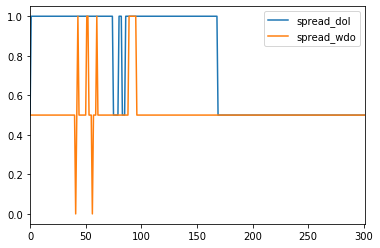

In [67]:
distortion_next[['spread_dol', 'spread_wdo']][distortion_next['level_0'] == 0].plot()

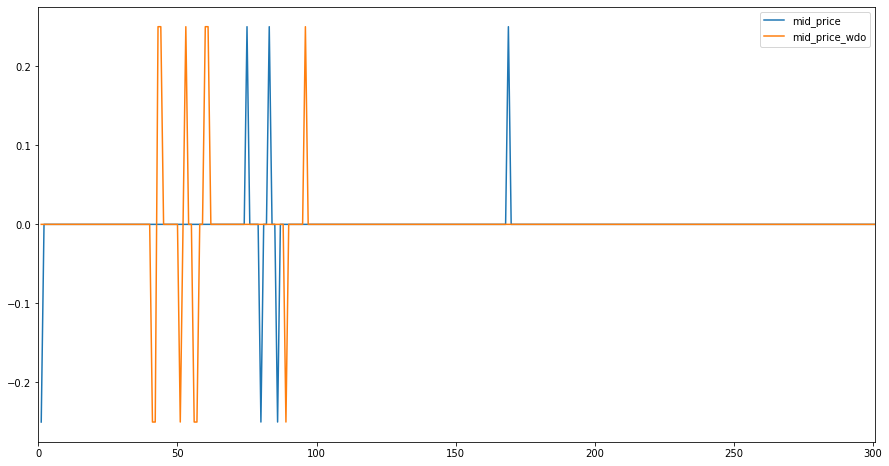

In [68]:
#dict_next[0][['mid_price', 'mid_price']].diff().plot(figsize=(15,8))
distortion_next[['mid_price', 'mid_price_wdo']][distortion_next['level_0'] == 0].plot(figsize=(15,8))


In [69]:
# def func(dataframe):
#     if dataframe['mid_price'] < 0:
#         val = 'Down'
#     elif dataframe['mid_price'] == 0:
#         val = 'Hold'
#     else:
#         val = 'Up'
#     return val

In [70]:
def func(dataframe):
    dataframe.loc[dataframe['mid_price'] < 0, 'movement_dol'] = -1
    dataframe.loc[dataframe['mid_price']  == 0, 'movement_dol'] = 0
    dataframe.loc[dataframe['mid_price']  > 0, 'movement_dol'] = 1
    dataframe.loc[dataframe['mid_price_wdo'] < 0, 'movement_wdo'] = -1
    dataframe.loc[dataframe['mid_price_wdo']  == 0, 'movement_wdo'] = 0
    dataframe.loc[dataframe['mid_price_wdo']  > 0, 'movement_wdo'] = 1
    return dataframe 

# for i in dict_next_aux.keys():
#     func(dict_next_aux[i])[['movement_dol', 'movement_wdo']].dropna(inplace = True)

In [71]:
# for i in dict_next_aux.keys():
#     dict_next_aux[i].loc[dict_next_aux[i]['mid_price'] < 0, 'movement_dol'] = -1
#     dict_next_aux[i].loc[dict_next_aux[i]['mid_price']  == 0, 'movement_dol'] = 0
#     dict_next_aux[i].loc[dict_next_aux[i]['mid_price']  > 0, 'movement_dol'] = 1
#     dict_next_aux[i].loc[dict_next_aux[i]['mid_price_wdo'] < 0, 'movement_wdo'] = -1
#     dict_next_aux[i].loc[dict_next_aux[i]['mid_price_wdo']  == 0, 'movement_wdo'] = 0
#     dict_next_aux[i].loc[dict_next_aux[i]['mid_price_wdo']  > 0, 'movement_wdo'] = 1

In [72]:
# func(distortion_next)
# distortion_next[['level_0', 'movement_dol', 'movement_wdo']].dropna().head()

In [73]:
# for i in dict_next_aux.keys():
#     func(dict_next_aux[i])[['movement_dol', 'movement_wdo']].dropna(inplace = True)

In [74]:
# dict_next_aux[0].head(10)

In [ ]:
# print(np.where(dict_next_aux[0]['movement_wdo'] == 1)[0][0], 
# np.where(dict_next_aux[0]['movement_wdo'] == -1)[0][0], np.where(dict_next_aux[0]['movement_dol'] == 1)[0][0], np.where(dict_next_aux[0]['movement_dol'] == -1)[0][0])


In [77]:
df = {}
for i in dict_next_aux.keys():
    df[i] = func(dict_next_aux[i])[['movement_dol', 'movement_wdo',  'mid_price', 'mid_price_wdo']]

In [78]:
for i in dict_next_aux.keys():
    df[i].dropna(inplace = True)

/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
dict_next_aux[0].head(10)

,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,ask_wdo_0,ask_quantity_wdo_0,bid_wdo_0,bid_quantity_wdo_0,spread_dol,spread_wdo,mid_price,mid_price_wdo,movement_dol,movement_wdo
129,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.5,NaN,NaN,NaN,NaN
130,1.0,0 days,0.0,0.0,-0.5,25.0,0.0,0.0,0.0,0.0,1.0,0.5,-0.25,0.0,-1.0,0.0
131,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.5,0.00,0.0,0.0,0.0
132,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0,0.0,0.0
133,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0,0.0,0.0
134,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0,0.0,0.0
135,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0,0.0,0.0
136,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0,0.0,0.0
137,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0,0.0,0.0
138,1.0,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.00,0.0,0.0,0.0


In [80]:
df[0].head()

,movement_dol,movement_wdo,mid_price,mid_price_wdo
130,-1.0,0.0,-0.25,0.0
131,0.0,0.0,0.00,0.0
132,0.0,0.0,0.00,0.0
133,0.0,0.0,0.00,0.0
134,0.0,0.0,0.00,0.0


In [ ]:
df = {}
for i in dict_next_aux.keys():
    df[i] = dict_next_aux[i][['movement_dol', 'movement_wdo', 'mid_price', 'mid_price_wdo']]

In [81]:
aux_dol = 0
aux_wdo = 0
follow_up  = 0
not_follow_up = 0
follow_down = 0
not_follow_down = 0
follow_up_wdo  = 0
not_follow_up_wdo = 0
follow_down_wdo = 0
not_follow_down_wdo = 0

for i in range(50,max(df.keys())):
    df[i].reset_index(inplace=True)
    for j in range(max(len(np.where(df[i]['movement_wdo'] == 1)[0]), len(np.where(df[i]['movement_wdo'] == -1)[0]), len(np.where(df[i]['movement_dol'] == 1)[0]), len(np.where(df[i]['movement_dol'] == -1)[0]))):
        if (len(np.where(df[i]['movement_wdo'] == 1)[0]) != 0)  and (len(np.where(df[i]['movement_wdo'] == -1)[0]) != 0) and (len(np.where(df[i]['movement_dol'] == 1)[0]) != 0) and (len(np.where(df[i]['movement_dol'] == -1)[0]) != 0):

            if min(np.where(df[i]['movement_wdo'] == 1)[0][0], np.where(df[i]['movement_wdo'] == -1)[0][0]) <  min(np.where(df[i]['movement_dol'] == 1)[0][0], np.where(df[i]['movement_dol'] == -1)[0][0]):
                aux_wdo+=1
                if np.where(df[i]['movement_wdo'] == 1)[0][0] < np.where(df[i]['movement_wdo'] == -1)[0][0]:
                    steps = np.where(df[i]['movement_wdo'] == -1)[0][0]
                    if np.where(df[i]['movement_dol'] == 1)[0][0] < steps:
                        follow_up_wdo +=1
                    else:
                        not_follow_up_wdo +=1  
                else:
                    steps = np.where(df[i]['movement_wdo'] == 1)[0][0]
                    if np.where(df[i]['movement_dol'] == -1)[0][0] < steps:
                        follow_down_wdo +=1
                    else:
                        not_follow_down_wdo +=1

            else:
                aux_dol+=1
                if np.where(df[i]['movement_dol'] == 1)[0][0] < np.where(df[i]['movement_dol'] == -1)[0][0]:
                    steps = np.where(df[i]['movement_dol'] == -1)[0][0]
                    if np.where(df[i]['movement_wdo'] == 1)[0][0] < steps:
                         follow_up +=1
                    else:
                        not_follow_up +=1
                else:
                    steps = np.where(df[i]['movement_dol'] == 1)[0][0]
                    if np.where(df[i]['movement_wdo'] == -1)[0][0] < steps:
                        follow_down +=1
                    else:
                        not_follow_down +=1


        df[i] = df[i].loc[steps:]
    #         df[i]['movement_dol'] = df[i]['movement_dol'].loc[steps:]
        df[i].dropna(inplace = True)
#     df[i].reset_index(inplace=True)

# TESTEEEE

In [135]:
aux_dol = 0
aux_wdo = 0
follow_up  = 0
not_follow_up = 0
follow_down = 0
not_follow_down = 0
follow_up_wdo  = 0
not_follow_up_wdo = 0
follow_down_wdo = 0
not_follow_down_wdo = 0
cum_sum_wdo_WDO = {}
cum_sum_dol_WDO = {}
cum_sum_wdo_DOL = {}
cum_sum_dol_DOL = {}

for i in range(50,max(df.keys())):
    cum_sum_wdo_WDO[i] = {}
    cum_sum_dol_WDO[i] = {}
    cum_sum_wdo_DOL[i] = {}
    cum_sum_dol_DOL[i] = {}
    df[i].reset_index(inplace=True)
    for j in range(max(len(np.where(df[i]['movement_wdo'] == 1)[0]), len(np.where(df[i]['movement_wdo'] == -1)[0]), len(np.where(df[i]['movement_dol'] == 1)[0]), len(np.where(df[i]['movement_dol'] == -1)[0]))):
        if (len(np.where(df[i]['movement_wdo'] == 1)[0]) != 0)  and (len(np.where(df[i]['movement_wdo'] == -1)[0]) != 0) and (len(np.where(df[i]['movement_dol'] == 1)[0]) != 0) and (len(np.where(df[i]['movement_dol'] == -1)[0]) != 0):

            if min(np.where(df[i]['movement_wdo'] == 1)[0][0], np.where(df[i]['movement_wdo'] == -1)[0][0]) <  min(np.where(df[i]['movement_dol'] == 1)[0][0], np.where(df[i]['movement_dol'] == -1)[0][0]):
                aux_wdo+=1
                if np.where(df[i]['movement_wdo'] == 1)[0][0] < np.where(df[i]['movement_wdo'] == -1)[0][0]:
                    steps = np.where(df[i]['movement_wdo'] == -1)[0][0]
                    if np.where(df[i]['movement_dol'] == 1)[0][0] < steps:
                        follow_up_wdo +=1
                        cum_sum_wdo_WDO[i][j] = df[i]['mid_price_wdo'].loc[np.where(df[i]['movement_wdo'] == 1)[0][0]:steps-1].sum()
                        cum_sum_dol_WDO[i][j] = df[i]['mid_price'].loc[np.where(df[i]['movement_dol'] == 1)[0][0]:steps-1].sum()
                    else:
                        not_follow_up_wdo +=1  
                else:
                    steps = np.where(df[i]['movement_wdo'] == 1)[0][0]
                    if np.where(df[i]['movement_dol'] == -1)[0][0] < steps:
                        follow_down_wdo +=1
                        cum_sum_wdo_WDO[i][j] = df[i]['mid_price_wdo'].loc[np.where(df[i]['movement_wdo'] == -1)[0][0]:steps-1].sum()
                        cum_sum_dol_WDO[i][j] = df[i]['mid_price'].loc[np.where(df[i]['movement_dol'] == -1)[0][0]:steps-1].sum()
                    else:
                        not_follow_down_wdo +=1

            else:
                aux_dol+=1
                if np.where(df[i]['movement_dol'] == 1)[0][0] < np.where(df[i]['movement_dol'] == -1)[0][0]:
                    steps = np.where(df[i]['movement_dol'] == -1)[0][0]
                    if np.where(df[i]['movement_wdo'] == 1)[0][0] < steps:
                        follow_up +=1
                        cum_sum_wdo_DOL[i][j] = df[i]['mid_price_wdo'].loc[np.where(df[i]['movement_wdo'] == 1)[0][0]:steps-1].sum()
                        cum_sum_dol_DOL[i][j] = df[i]['mid_price'].loc[np.where(df[i]['movement_dol'] == 1)[0][0]:steps-1].sum()
                    else:
                        not_follow_up +=1
                else:
                    steps = np.where(df[i]['movement_dol'] == 1)[0][0]
                    if np.where(df[i]['movement_wdo'] == -1)[0][0] < steps:
                        follow_down +=1
                        cum_sum_wdo_DOL[i][j] = df[i]['mid_price_wdo'].loc[np.where(df[i]['movement_wdo'] == -1)[0][0]:steps-1].sum()
                        cum_sum_dol_DOL[i][j] = df[i]['mid_price'].loc[np.where(df[i]['movement_dol'] == -1)[0][0]:steps-1].sum()
                    else:
                        not_follow_down +=1

        df[i] = df[i].loc[steps:]
        df[i].dropna(inplace = True)
   # df[i].reset_index(inplace=True)

# Testesss

In [84]:
print("Dia 14/11 - follow_up_wdo: {}, not_follow_up_wdo: {} , follow_down_wdo: {}, not_follow_down_wdo: {}, follow_up: {} , not_follow_up: {},              follow_down: {}, not_follow_down: {}, aux_wdo: {} , aux_dol: {}".format(follow_up_wdo, not_follow_up_wdo, follow_down_wdo, not_follow_down_wdo, follow_up, not_follow_up, follow_down, not_follow_down, aux_wdo, aux_dol))

In [85]:
print('Dia 14/11 - Porcetagem DOL seguiu WDO em up : {}, Porcetagem DOL seguiu WDO em down: {},                                         Porcetagem WDO seguiu DOL em up: {}, Porcetagem WDO seguiu DOL em down: {}'.format(follow_up_wdo/not_follow_up_wdo, follow_down_wdo/not_follow_down_wdo, follow_up/not_follow_up, follow_down/not_follow_down))

In [86]:
print("Dia 13/11 - follow_up_wdo: {}, not_follow_up_wdo: {} , follow_down_wdo: {}, not_follow_down_wdo: {}, follow_up: {} , not_follow_up: {},              follow_down: {}, not_follow_down: {}, aux_wdo: {}, aux_dol: {}".format(3629, 12214, 3566, 13114, 7570, 5146, 7881, 4995, 32523, 25592))

In [87]:
print('Dia 13/11 - Porcetagem DOL seguiu WDO em up : {}, Porcetagem DOL seguiu WDO em down: {},                                         Porcetagem WDO seguiu DOL em up: {}, Porcetagem WDO seguiu DOL em down: {}'.format(3629/12214, 3566/13114, 7570/5146, 7881/4995))

In [89]:
print("Dia 11/11 - follow_up_wdo: {}, not_follow_up_wdo: {} , follow_down_wdo: {}, not_follow_down_wdo: {}, follow_up: {} , not_follow_up: {},            \t\t  follow_down: {}, not_follow_down: {}, aux_wdo: {} , aux_dol: {}".format(follow_up_wdo, not_follow_up_wdo, follow_down_wdo, not_follow_down_wdo, follow_up, not_follow_up, follow_down, not_follow_down, aux_wdo, aux_dol))

Dia 11/11 - follow_up_wdo: 1275, not_follow_up_wdo: 7613 , follow_down_wdo: 1129, not_follow_down_wdo: 7944, follow_up: 2320 , not_follow_up: 2655,            		  follow_down: 2469, not_follow_down: 2345, aux_wdo: 17961 , aux_dol: 9789


In [90]:
print('Dia 11/11 - Porcetagem DOL seguiu WDO em up : {}, Porcetagem DOL seguiu WDO em down: {},                            \t\t             Porcetagem WDO seguiu DOL em up: {}, Porcetagem WDO seguiu DOL em down: {}'.format(follow_up_wdo/not_follow_up_wdo, follow_down_wdo/not_follow_down_wdo, follow_up/not_follow_up, follow_down/not_follow_down))

Dia 11/11 - Porcetagem DOL seguiu WDO em up : 0.16747668461841586, Porcetagem DOL seguiu WDO em down: 0.14211983887210472,                            		             Porcetagem WDO seguiu DOL em up: 0.8738229755178908, Porcetagem WDO seguiu DOL em down: 1.0528784648187632


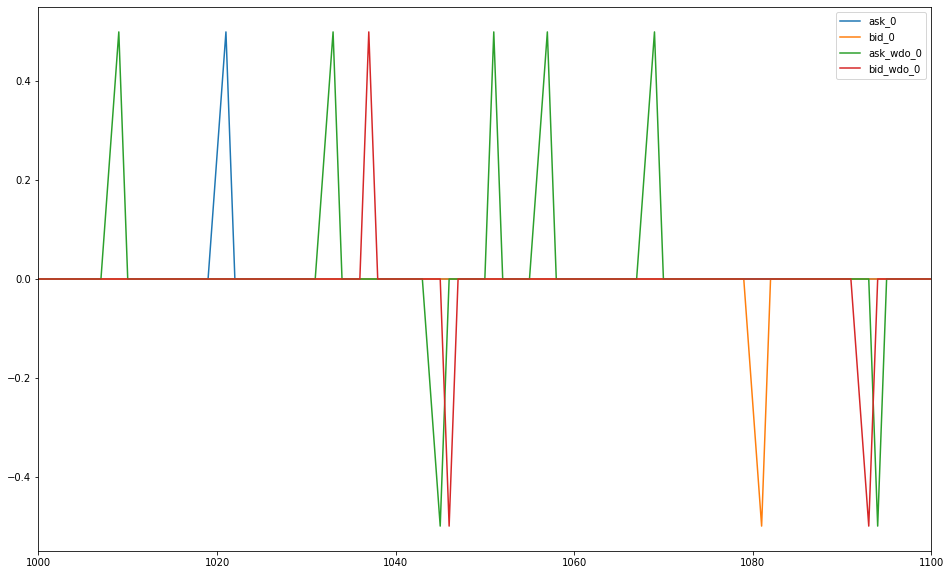

In [211]:
mover_next.dropna().loc[1000:1100].plot(figsize=(16,10))

In [217]:
mover_next.dropna().head(30)

,level_0,ask_0,bid_0,ask_wdo_0,bid_wdo_0
1,0,0.0,0.0,-0.5,0.0
2,0,0.0,0.0,0.0,-0.5
3,0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0,0.0
6,0,0.0,0.0,0.0,0.0
7,0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,0.0,0.0
9,0,0.0,0.0,0.0,0.0
10,0,0.0,0.0,0.0,0.0


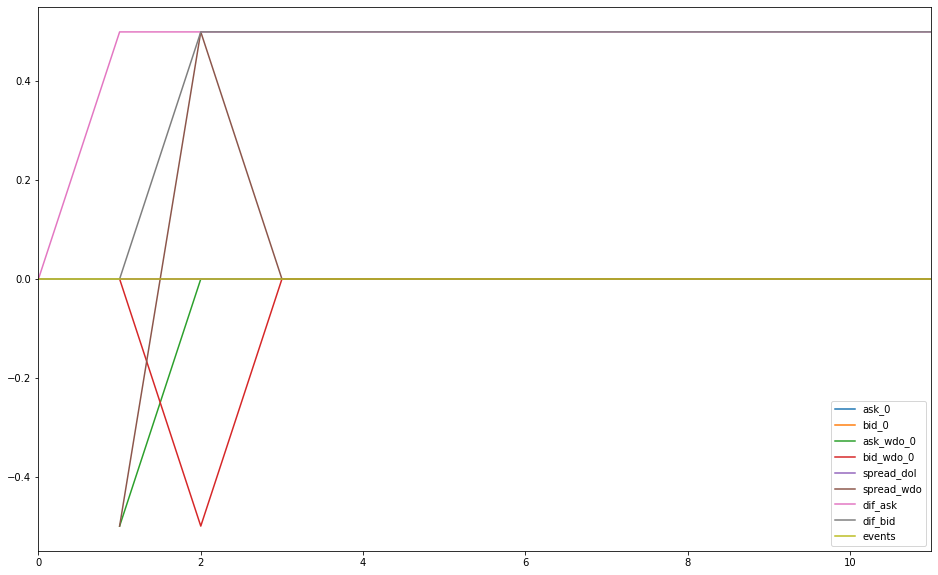

In [139]:
mover_next[mover_next.events == 0].plot(figsize=(16,10))

# Teste Estatisticos para ver phase shift

In [64]:
from scipy import signal


sig = slice_['mid_price']
sig_noise = slice_['mid_price_wdo']
corr = signal.correlate(sig, sig_noise, mode='same')

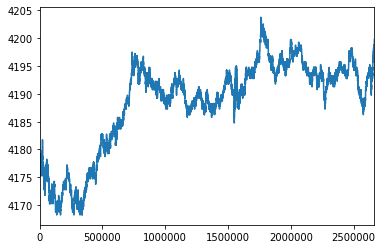

In [68]:
# sig.plot()
sig_noise.plot()

(array([1332467]),)

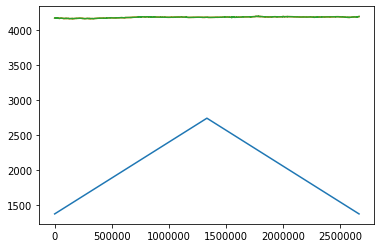

In [83]:
plt.plot(corr/17040064041)#.plot()
plt.plot(sig)
plt.plot(sig_noise)


In [91]:
sig.loc[1332467:]
# sig_noise.loc[1332467:]


1332467    4189.75
1332468    4189.75
1332469    4189.75
1332470    4189.75
1332471    4189.75
            ...   
2664930    4199.50
2664931    4199.50
2664932    4199.50
2664933    4199.50
2664934    4199.50
Name: mid_price, Length: 1332468, dtype: float64

In [39]:
np.correlate(sig, sig_noise)

array([4.67509748e+13])

In [73]:
def autocorr(x, y, t=1):
    return np.corrcoef(np.array([x[:-t], y[t:]]))


In [75]:
autocorr(sig_noise, sig)

array([[1.       , 0.9997213],
       [0.9997213, 1.       ]])

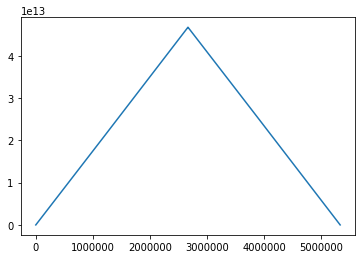

In [42]:
plt.plot(signal.convolve(sig, sig_noise))

# Teste que comprova linearidade entre as series

In [47]:
(np.corrcoef(sig, sig_noise))

array([[1.        , 0.99972254],
       [0.99972254, 1.        ]])

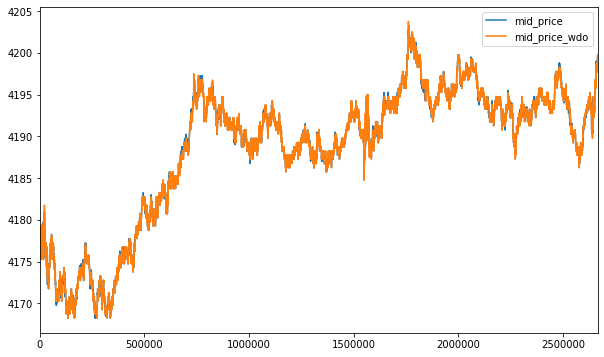

In [49]:
slice_[['mid_price', 'mid_price_wdo']].plot(figsize=(10,6))

/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/asimovws/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



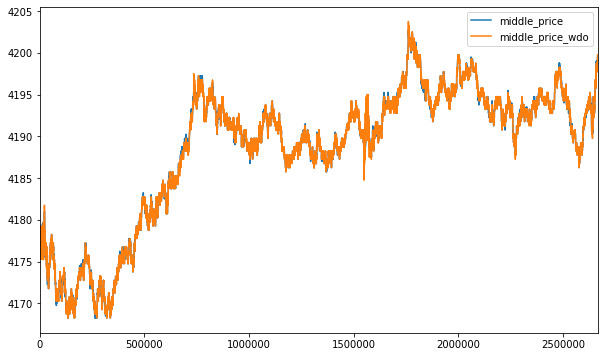

In [52]:
slice_[['middle_price', 'middle_price_wdo']].plot(figsize=(10,6))

In [236]:
df['relative_spread_dol'] = np.log(df['ask_0']) - np.log(df['bid_0'])

/home/luiz/.local/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning:

divide by zero encountered in log



In [239]:
df['log_spread_dol'] = np.log(np.log(df['ask_0']) - np.log(df['bid_0']))

/home/luiz/.local/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning:

invalid value encountered in log



In [258]:
df[df.spread_dol < 0].head()

,index,ask_0,ask_quantity_0,bid_0,bid_quantity_0,i_ask,i_bid,msg_seq_num,spread_dol,relative_spread_dol,log_spread_dol,middle_price
166,2019-11-14 11:57:26.026000+00:00,4184.0,5.0,4184.5,5.0,159.0,161.0,7657109,-0.5,-0.000119,NaN,4184.25
168,2019-11-14 11:57:26.215000+00:00,4184.0,5.0,4185.0,5.0,159.0,163.0,7657112,-1.0,-0.000239,NaN,4184.50
170,2019-11-14 11:57:26.373000+00:00,4184.0,5.0,4185.5,5.0,159.0,165.0,7657115,-1.5,-0.000358,NaN,4184.75
172,2019-11-14 11:57:26.541000+00:00,4184.0,5.0,4186.0,5.0,159.0,167.0,7657116,-2.0,-0.000478,NaN,4185.00
174,2019-11-14 11:57:26.686000+00:00,4184.0,5.0,4186.5,5.0,159.0,169.0,7657117,-2.5,-0.000597,NaN,4185.25


In [41]:
import matplotlib.pyplot as plt

# fig, axes = plt.subplots( dpi=120, figsize=(6,3))

# # plt.legend(('ask_0', 'bid_0'),loc='upper left')

# plt.plot(df.loc[573+7:710][['spread_dol', 'relative_spread_dol', 'log_spread_dol']])#.plot()#

# plt.show()



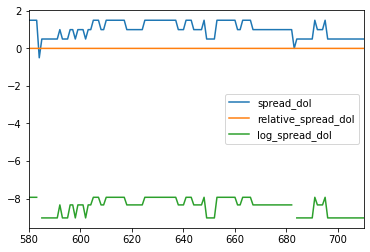

In [256]:
df.loc[573+7:710][['spread_dol', 'relative_spread_dol', 'log_spread_dol']].plot()

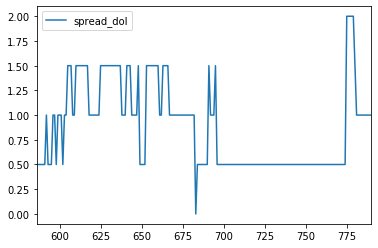

In [264]:
df.loc[579+7:790][['spread_dol']].plot()

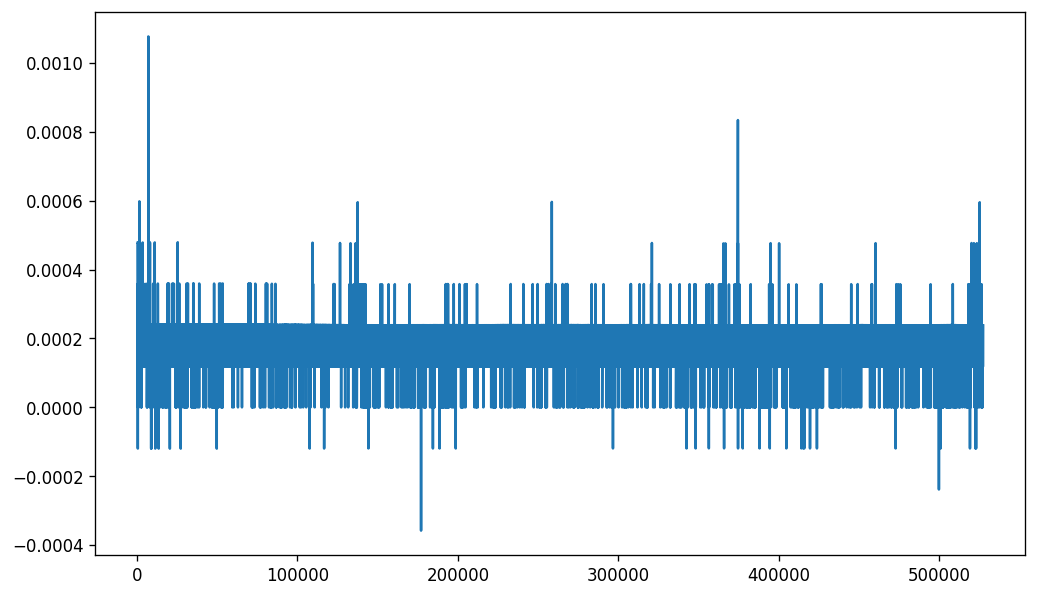

In [246]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots( dpi=120, figsize=(10,6))

plt.plot(df['relative_spread_dol'].loc[500:])#.plot()#head(30)
#plt.plot(df['log_spread_dol'].loc[500:], linewidth=.5)#.plot()#head(30)
# plt.plot(df['spread_dol'].loc[500:], linewidth=.5)#.plot()#head(30)



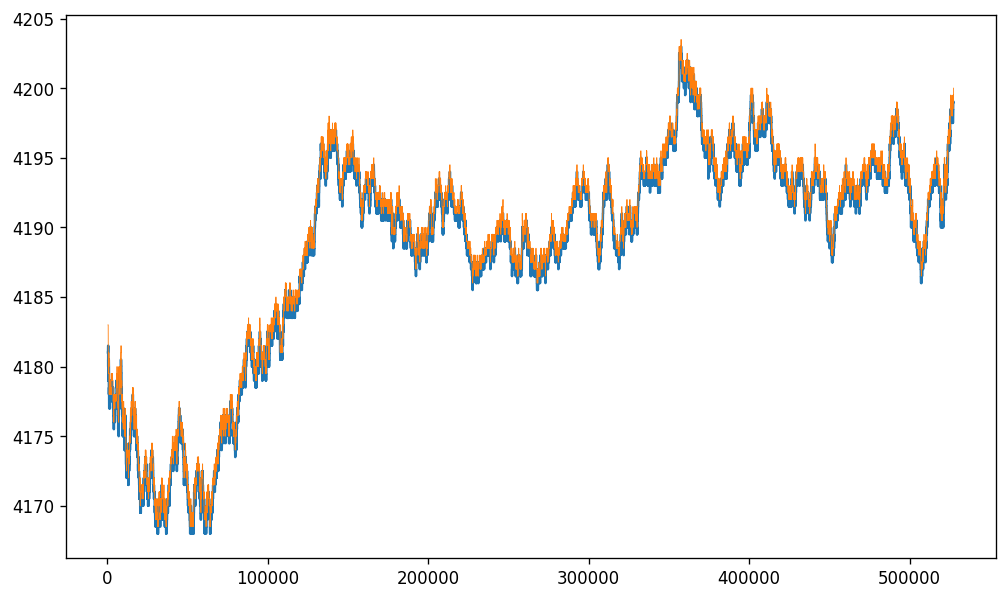

In [241]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots( dpi=120, figsize=(10,6))

plt.plot(df['bid_0'].loc[500:])#.plot()#head(30)
plt.plot(df['ask_0'].loc[500:], linewidth=.5)#.plot()#head(30)



In [85]:
dl = df[['ask_0','ask_quantity_0','bid_0','bid_quantity_0']]

In [86]:
np.where(df['spread_dol'] == 0.5)[0][0]

574

In [91]:
df.rename({'index' : 'timestamp'}, axis = 1, inplace = True)

/home/luiz/.local/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df.reset_index(inplace=True)

In [95]:
np.where(df.loc[574::]['spread_dol'] != 0.5)[0][0]

7

In [127]:
df.loc[574::].head()

,index,timestamp,ask_0,ask_quantity_0,bid_0,bid_quantity_0,i_ask,i_bid,msg_seq_num,spread_dol
574,585,2019-11-14 12:00:45.722000+00:00,4181.0,535.0,4180.5,15.0,579.0,578.0,7658707,0.5
575,586,2019-11-14 12:00:45.723000+00:00,4181.0,535.0,4180.5,15.0,579.0,580.0,7658709,0.5
576,587,2019-11-14 12:00:45.723000+00:00,4181.0,535.0,4180.5,15.0,579.0,581.0,7658710,0.5
577,588,2019-11-14 12:00:45.723000+00:00,4181.0,535.0,4180.5,10.0,579.0,582.0,7658711,0.5
578,589,2019-11-14 12:00:45.723000+00:00,4181.0,535.0,4180.5,10.0,583.0,582.0,7658712,0.5


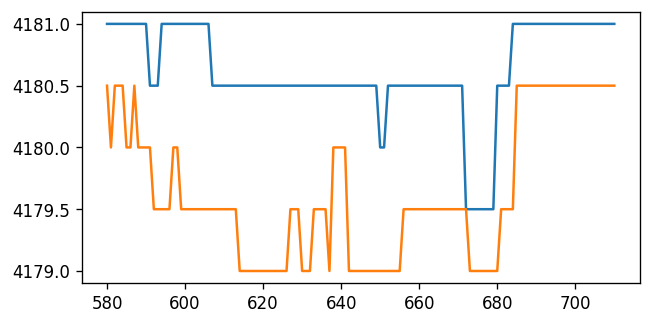

In [123]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots( dpi=120, figsize=(6,3))

# plt.legend(('ask_0', 'bid_0'),loc='upper left')

plt.plot(df.loc[573+7:710][['ask_0', 'bid_0']])#.plot()#

plt.show()



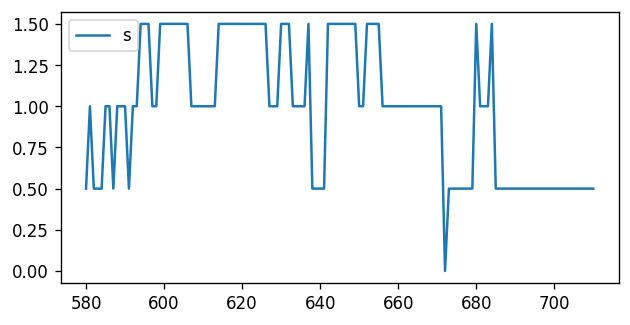

In [124]:
fig, axes = plt.subplots( dpi=120, figsize=(6,3))

plt.plot(df.loc[573+7:710][['spread_dol']])#.plot()#
plt.legend(('spread_dol'),loc='upper left')


In [128]:
np.where(df.loc[700:]['spread_dol'] != 0.5)[0][0]

64

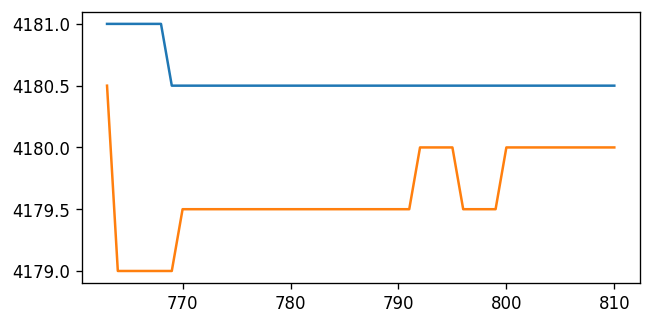

In [139]:
fig, axes = plt.subplots( dpi=120, figsize=(6,3))

# plt.legend(('ask_0', 'bid_0'),loc='upper left')

plt.plot(df.loc[763:810][['ask_0', 'bid_0']])#.plot()#

plt.show()


In [133]:
np.where(df.loc[800:]['spread_dol'] != 0.5)[0][0]

104

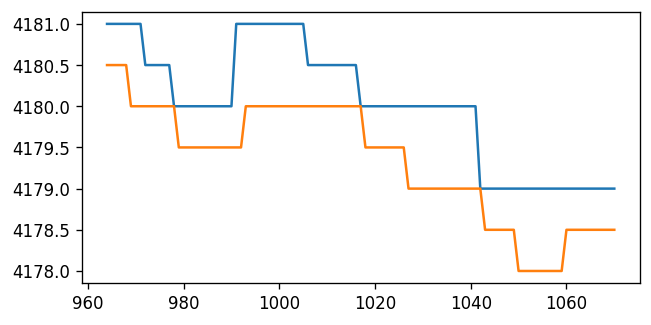

In [146]:
fig, axes = plt.subplots( dpi=120, figsize=(6,3))

# plt.legend(('ask_0', 'bid_0'),loc='upper left')

plt.plot(df.loc[964:1070][['ask_0', 'bid_0']])#.plot()#

plt.show()

In [149]:
df[df.spread_dol == 0.5].shape[0] / df.shape[0]

0.7952566261587244

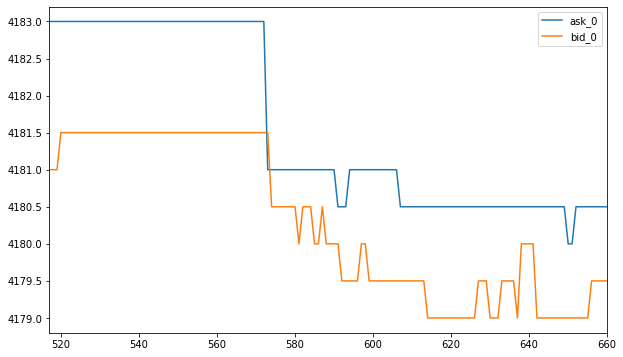

In [126]:
df.loc[480+37:525+135][['ask_0', 'bid_0']].plot(figsize=(10,6) )#

In [116]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [118]:
grangers_causation_matrix(df, variables = dl.columns)

,ask_0_x,ask_quantity_0_x,bid_0_x,bid_quantity_0_x
ask_0_y,1.0,0.0,0.0,0.0
ask_quantity_0_y,0.0,1.0,0.0,0.0
bid_0_y,0.0,0.0,1.0,0.0
bid_quantity_0_y,0.0,0.0,0.0,1.0


In [60]:
print(bid[bid['bid_0'] != 0] , len(events[ (events["side"] != "A") & (events["side"] != "None")]["msg_seq_num"].values))


                                   bid_0  bid_quantity_0   i_bid  msg_seq_num
2019-11-13 11:55:00.073000+00:00  4160.0             5.0       5      4862919
2019-11-13 11:55:00.132000+00:00  4160.0             5.0      13      4862928
2019-11-13 11:55:00.907000+00:00  4200.0             5.0      14      4862934
2019-11-13 11:55:05.977000+00:00  4200.0             5.0      15      4863029
2019-11-13 11:55:07.753000+00:00  4200.0             5.0      16      4863240
...                                  ...             ...     ...          ...
2019-11-13 21:14:59.232000+00:00  4174.5            15.0  595112      7646431
2019-11-13 21:14:59.335000+00:00  4174.5            15.0  595119      7646447
2019-11-13 21:14:59.335000+00:00  4174.5            20.0  595120      7646448
2019-11-13 21:14:59.666000+00:00  4174.5            15.0  595149      7646505
2019-11-13 21:15:00.004000+00:00  4174.5            15.0  595153      7646526

[286707 rows x 4 columns] 286697


In [40]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(dl)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
ask_0  ::  18120.64  > 40.1749   =>   True
ask_quantity_0 ::  8785.19   > 24.2761   =>   True
bid_0  ::  2200.28   > 12.3212   =>   True
bid_quantity_0 ::  0.0       > 4.1296    =>   False


In [42]:
nobs = 100000
dl_train, dl_test = dl[0:-nobs], dl[-nobs:]

# Check size
print(dl_train.shape)  # (119, 8)
print(dl_test.shape)  # (4, 8

(495166, 4)
(100000, 4)


In [54]:
308442+286697

595139

In [49]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

In [50]:
# ADF Test on each column
for name, column in dl_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

NameError: name 'adfuller' is not defined